In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('House_Rent_Dataset.csv')
print(df.shape)
df.head()

(4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Columns description
**BHK**: Number of Bedrooms, Hall, Kitchen.

**Rent**: Rent of the Houses/Apartments/Flats.

**Size** : Size of the Houses/Apartments/Flats in Square Feet.

**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality**: Locality of the Houses/Apartments/Flats.

**City**: City where the Houses/Apartments/Flats are Located.

**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

**Bathroom**: Number of Bathrooms.

**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [5]:
#Checking if there's any missing values
print(df.isna().sum(),"\n")
print(df.isnull().sum(),"\n")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
df.drop_duplicates(inplace=True)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On: 81 unique values
BHK: 6 unique values
Rent: 243 unique values
Size: 615 unique values
Floor: 480 unique values
Area Type: 3 unique values
Area Locality: 2235 unique values
City: 6 unique values
Furnishing Status: 3 unique values
Tenant Preferred: 3 unique values
Bathroom: 8 unique values
Point of Contact: 3 unique values


In [6]:
#Exploring the floor column
print(df['Floor'].unique()[:30])
df['Floor'].unique().max(),df['Floor'].unique().min()
# Bear in mind that the number of words is different

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2']


('Upper Basement out of 9', '1')

In [7]:
def find_floor_number(name):
    if name=="Ground":
        return 0
    elif name=="Upper Basement":
        return -1
    elif name=="Lower Basement":
        return -2
    else: return int(name)
def find_floor(name):
    '''
        Ground out of...
        (Lower and Upper) Basement out of...
        2 out of ...
        1
        
        Only in case of basement and number we return the 
        first element of list, but in case of these arrays which 
        after split(" ") will have length 1, it is better to use
        try,except structure
    '''
    name = name.split(" ")
    try:
        if(name[1]=="Basement"): 
            return find_floor_number(" ".join(name[:2]))
        else: return find_floor_number(name[0])
    except:
        return find_floor_number(name[0])
df["Floor_number"] = df["Floor"].apply(find_floor)
df["Floor_number"].describe()

count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor_number, dtype: float64

For conviniece I decided to convert Size from imperial to metric units

In [8]:
# df['Size'] = df['Size'].apply(lambda x: round(x*0.09290304,1))
df['Size'].max()

8000

Now let's modify date column to set apart months from 'Posted On' column which will come in handy later on in the analysis.

In [9]:
df['Month number'] = pd.to_datetime(df['Posted On'],format='%Y-%m-%d').dt.month
map_month = {4:"April",5:"May",6:"June",7:"July",8:"August"}
df['Month'] = df['Month number'].map(map_month)
df['Month'].unique()

array(['May', 'July', 'April', 'June'], dtype=object)

c:\Users\wikto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


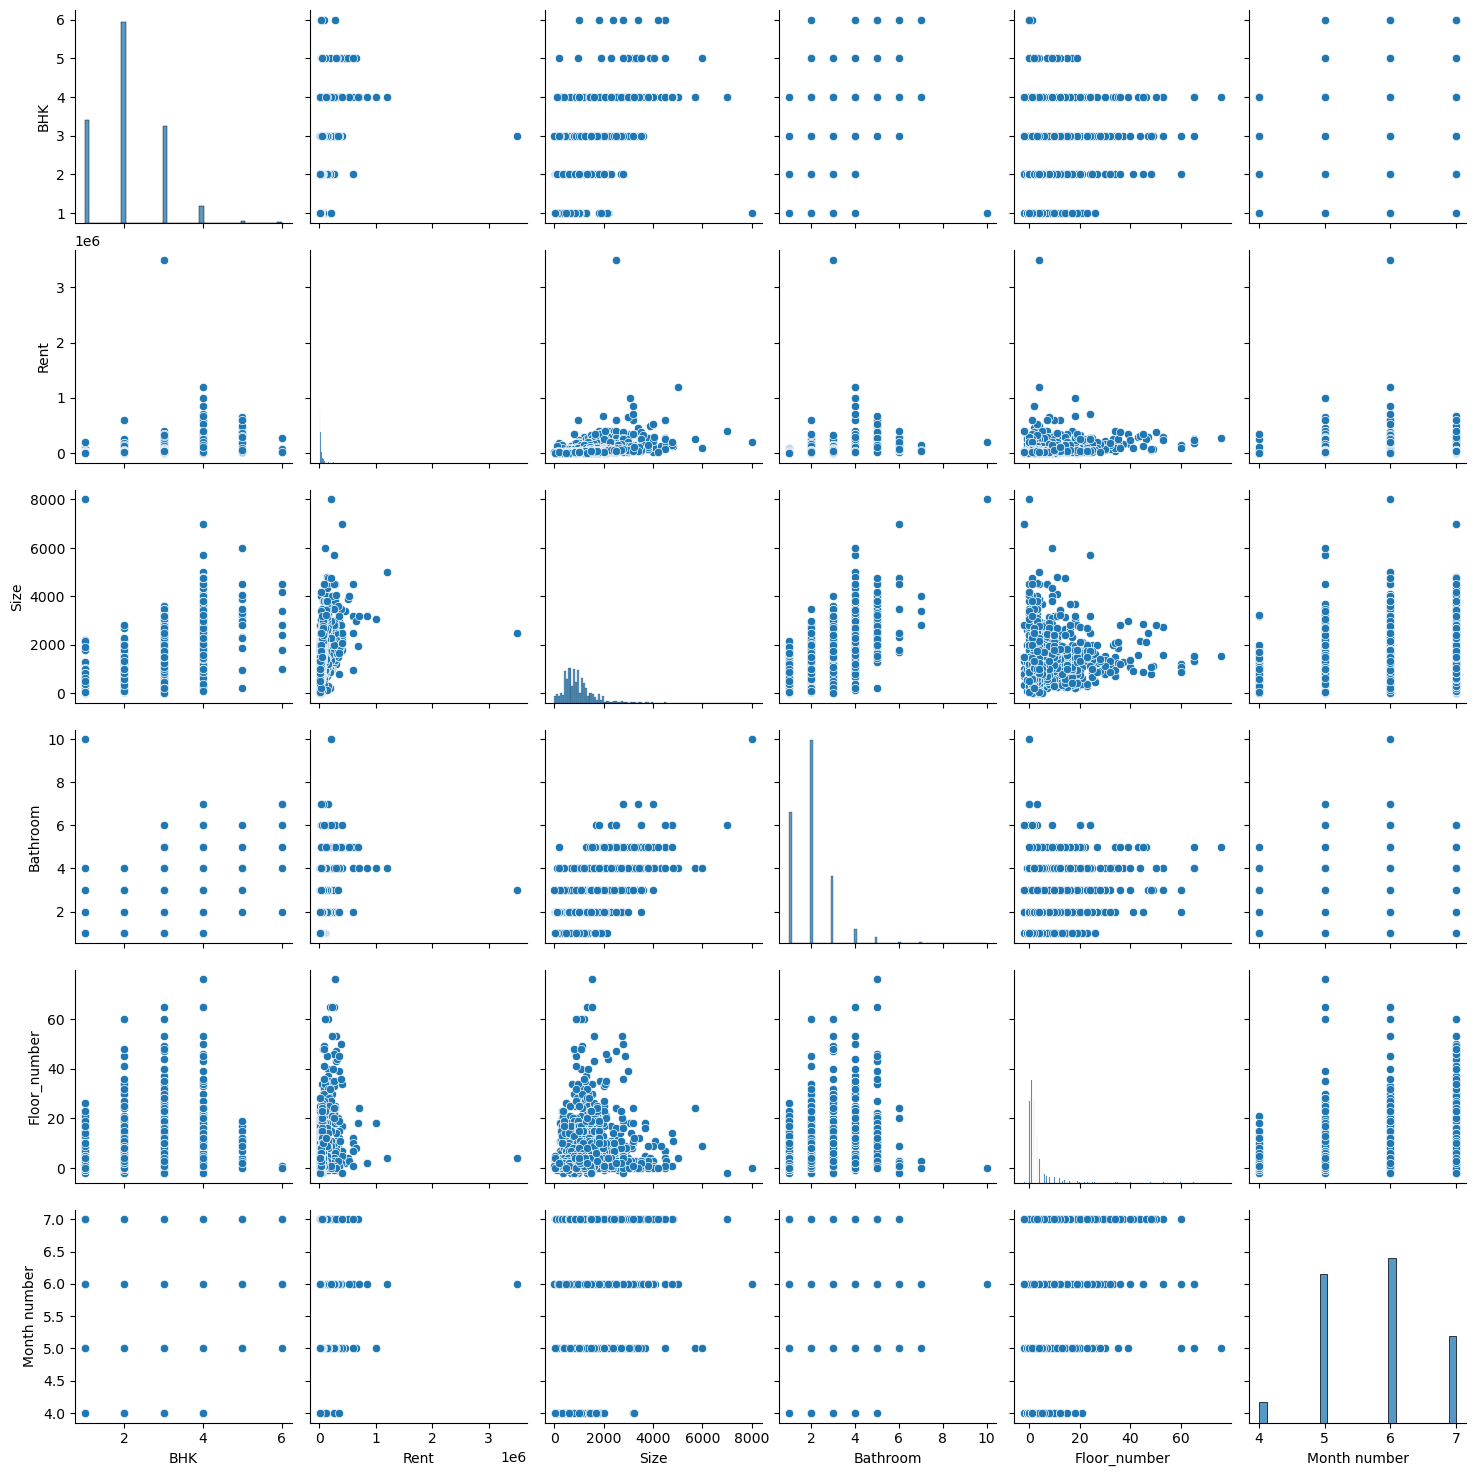

In [10]:
sns.pairplot(df)

<Axes: >

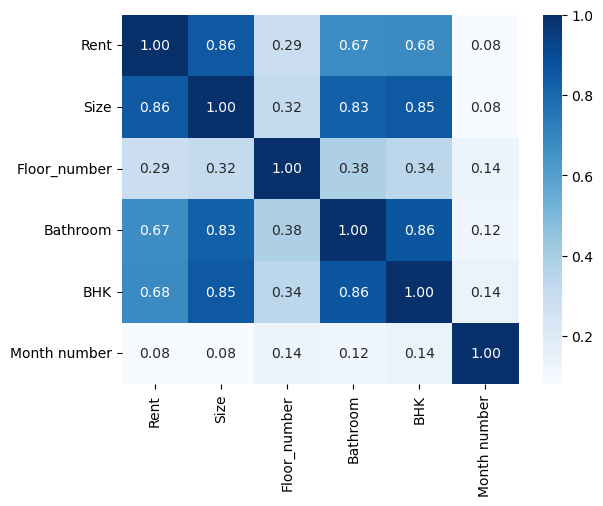

In [11]:
correlation_matrix = df[df['City']=='Mumbai'][['Rent','Size','Floor_number','Bathroom','BHK','Month number']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")


### Rent distribution


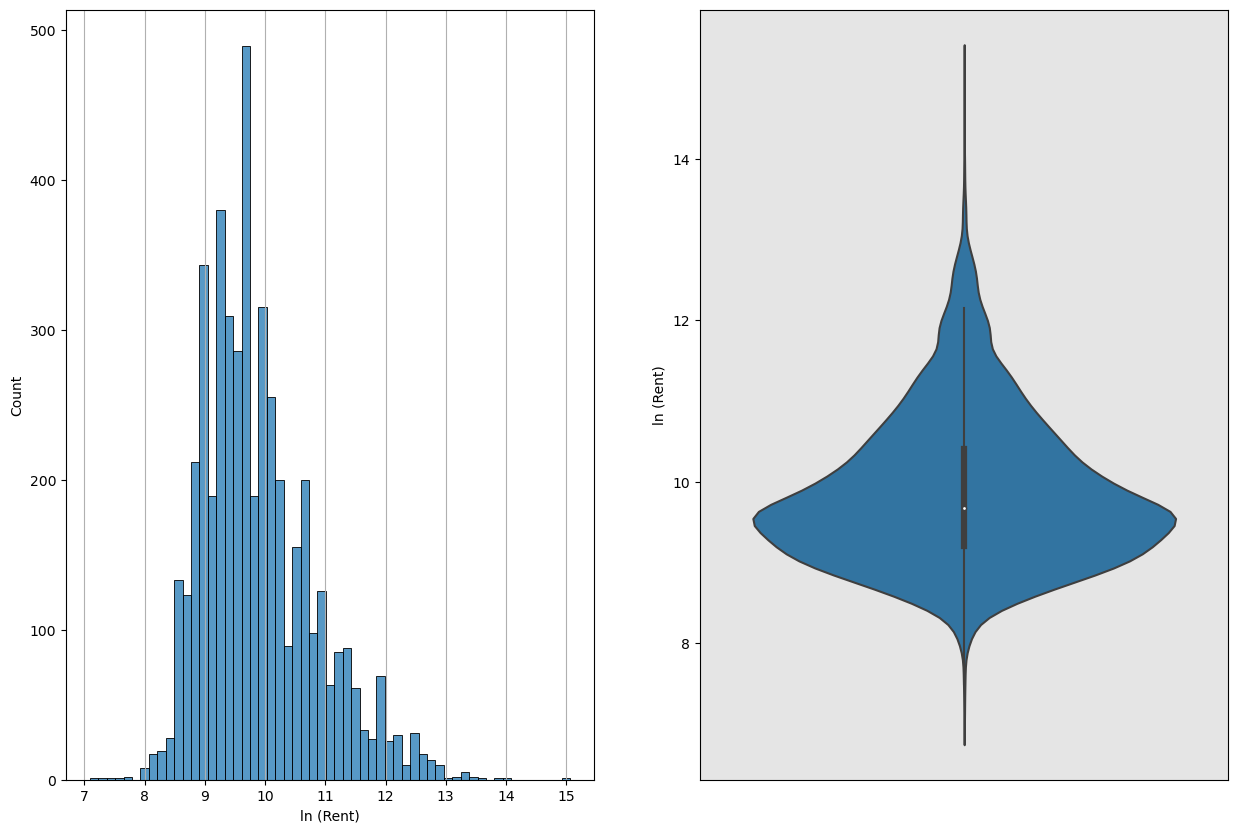

In [12]:
fig,ax = plt.subplots(figsize=(15,10),ncols=2)
ax[0].grid(axis='x')
ax[0].set_xlabel("ln (Rent)")
data = df["Rent"]
sns.histplot(np.log(data),ax=ax[0])
# sns.lineplot(np.log(data))
sns.violinplot(np.log(data),ax=ax[1])
ax[1].set_ylabel("ln (Rent)")
ax[1].set_xticks([])
data.describe()
plt.gca().set_facecolor('#e5e5e5')


* I decided to use log function in order to reduce impact of substancial outliers which are in the Rent column.
* As we can see the rent columnn has a bit of positive skew.

### Dates distribution

     Month   Rent
0      May  10000
1      May  20000
2      May  17000
3     July  10000
4      May   7500
...    ...    ...
4741   May  15000
4742   May  29000
4743  July  35000
4744  July  45000
4745   May  15000

[4746 rows x 2 columns]


,Size,Rent,Floor_number
Month number,,,
4,770.035088,19070.504386,2.135965
5,906.581202,27556.183819,2.773349
6,964.054330,37387.461001,3.293168
7,1124.747444,46938.251534,5.150307


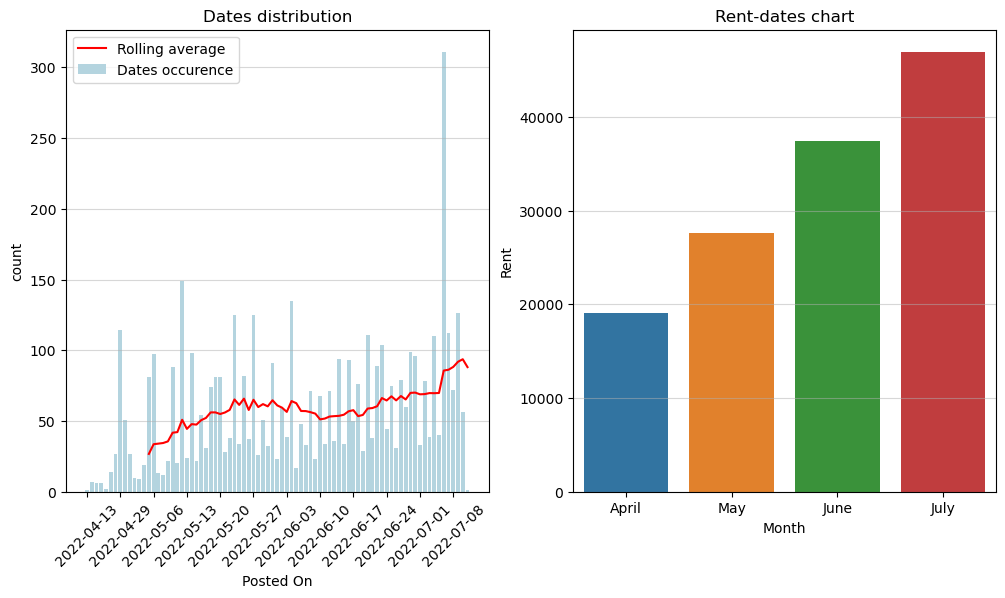

In [13]:
# sns.set_style("whitegrid")

fig,axes = plt.subplots(figsize=(12,6),ncols=2)



data = df['Posted On'].value_counts().sort_index()
ax = sns.barplot(x=data.index,y=data,
                color='lightblue',label="Dates occurence",ax=axes[0])
ax1 = sns.lineplot(x=data.index,y=data.rolling(14).mean(),
                color='red',zorder=999,label="Rolling average",ax=axes[0])
ax1.tick_params(axis='x',rotation=90)
ax1.set_title("Dates distribution")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y',alpha=0.5)
ax1.set_xticks(
            ticks=range(0, len(data),7)
            )


data = df[['Month','Rent']]
month_order = ['April', 'May', 'June', 'July']
print(data)
ax2 = sns.barplot(x=data['Month'],y=data['Rent'],ax=axes[1],order=month_order,errorbar=None)
ax2.grid(axis='y',alpha=0.5)
ax2.set_title("Rent-dates chart")
df[['Size','Month number','Rent','Floor_number']].groupby(by="Month number").mean()


* Listings posted remained relatively consistent across our dataset, regardless of the date. However when rolling average of last 14 days is applied we can conclude that there are slightly more postings over time.
* There's high, positive correlation between the time and the rent. The further we go, the costlier listings appear to be, which might be rlated to a fact that the size of average flat also increases

### Floors

count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor_number, dtype: float64


,Rent,Floor_number
Rent,1.0000,0.3262
Floor_number,0.3262,1.0000


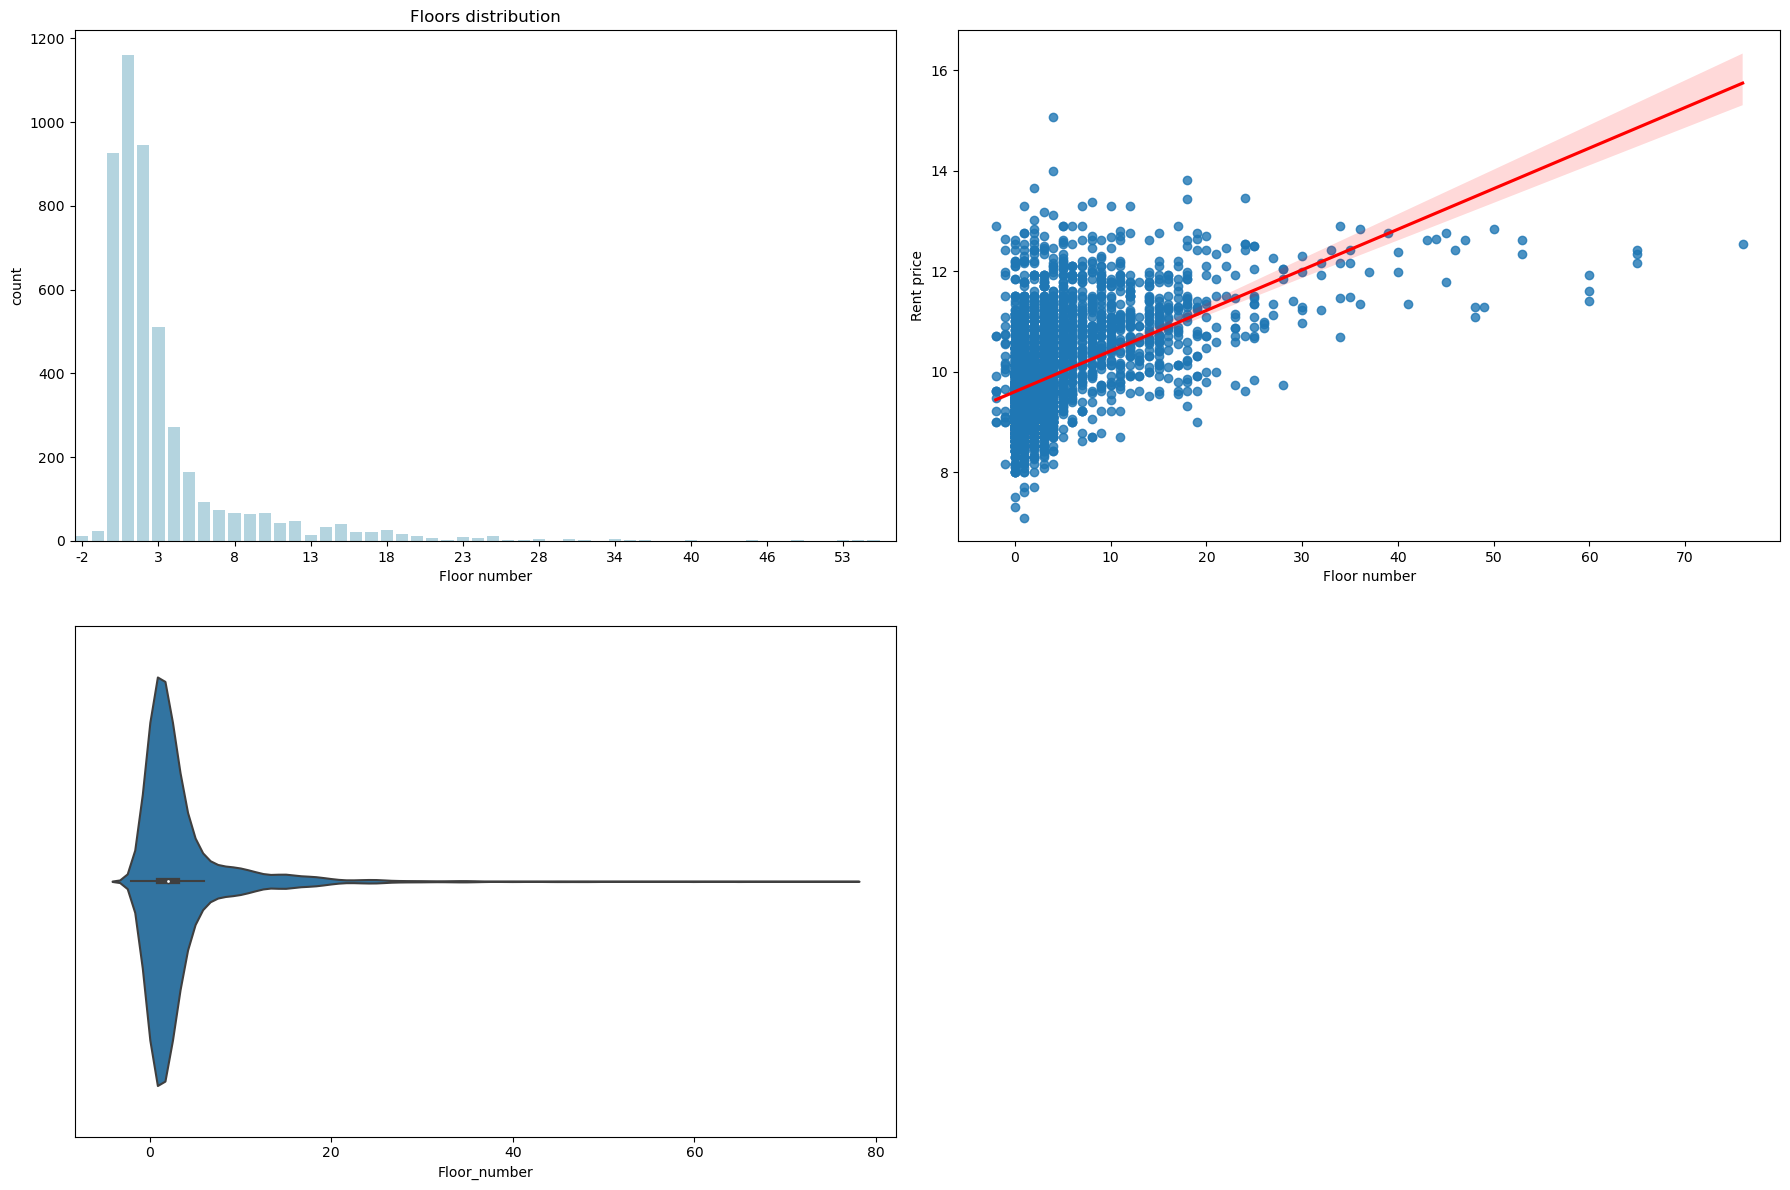

In [14]:
#Floors
fig,axes = plt.subplots(figsize=(18,12),ncols=2,nrows=2)

ax1 = axes[0,0]
data = df['Floor_number'].value_counts().sort_index()
x=data.index
max_floors = data.idxmax()
num_of_floors = data.max()
sns.barplot(x=x,y=data,ax=ax1,color='lightblue')
ax1.set_title("Floors distribution")
ax1.set_xlabel("Floor number")
ax1.set_xticks(
            ticks=range(0, len(data),5)
            )

ax2 = axes[0,1]
data = df
y_data = np.log(data['Rent'])
sns.regplot(x=data['Floor_number'],y=y_data,ax=ax2,line_kws={"color":"red"}).set_xlabel("Floor number")
ax2.set_ylabel("Rent price")

ax2=axes[1,0]
data = df['Floor_number']
sns.violinplot(data,ax=ax2,orient='h')
ax2.set_yticks([])
ax2.set_xlabel("Floor_number")
print(data.describe())

axes[1,1].axis('off')
plt.tight_layout(h_pad=3)

# np.corrcoef(data['Floor_number'],data["Rent"])
# print(data["Rent"])
df[['Rent','Floor_number']].corr()

* Floors -2,-1 refer to basement
* Moderate correlation with Rent column
* Data concentrated mainly in smaller values (25_percentile=1 floor 75_percentile=3 floors) with outliers as high as 76th floor

### Size

8000


,Rent,Size
Rent,1.000000,0.388404
Size,0.388404,1.000000


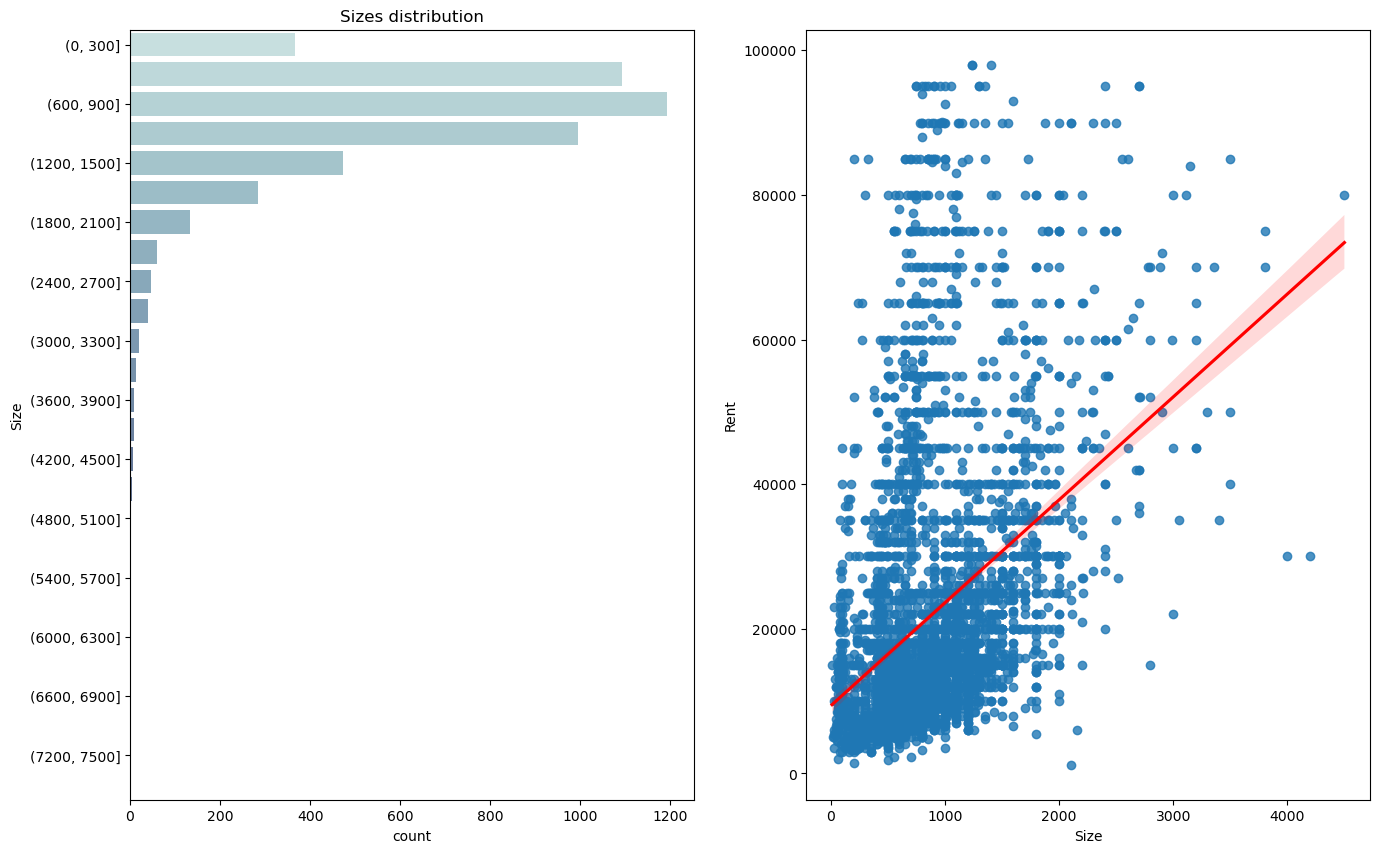

In [15]:
sns.color_palette("deep")
fig,axes = plt.subplots(figsize=(16,10),ncols=2)

ax1 = axes[0]
max_size = df['Size'].max()
print(max_size)
data_binned = pd.cut(df['Size'],bins=np.arange(0,max_size,300)).value_counts().sort_index()
colors = sns.color_palette("ch:start=.2,rot=-.3",len(data_binned))
sns.barplot(x=data_binned, y=data_binned.index,ax=ax1,palette=colors)
ax1.set_yticks(
    ticks=range(0,len(data_binned),2)
)
ax1.set_title("Sizes distribution")

ax2=axes[1]
data = df[df['Rent']<1e5][['Rent','Size']]
sns.regplot(y=data['Rent'],x=data['Size'],line_kws={'color':'red'})
data.corr()

* The highest number of listings falls in the range of 600 to 900.
* Correlation exhibits a noticeable increase compared to Floor_number column which suggest a stronger dependency between Rent and Size

### Other columns

   BHK  count
0    2   2265
1    1   1167
2    3   1098
3    4    189
4    5     19
5    6      8


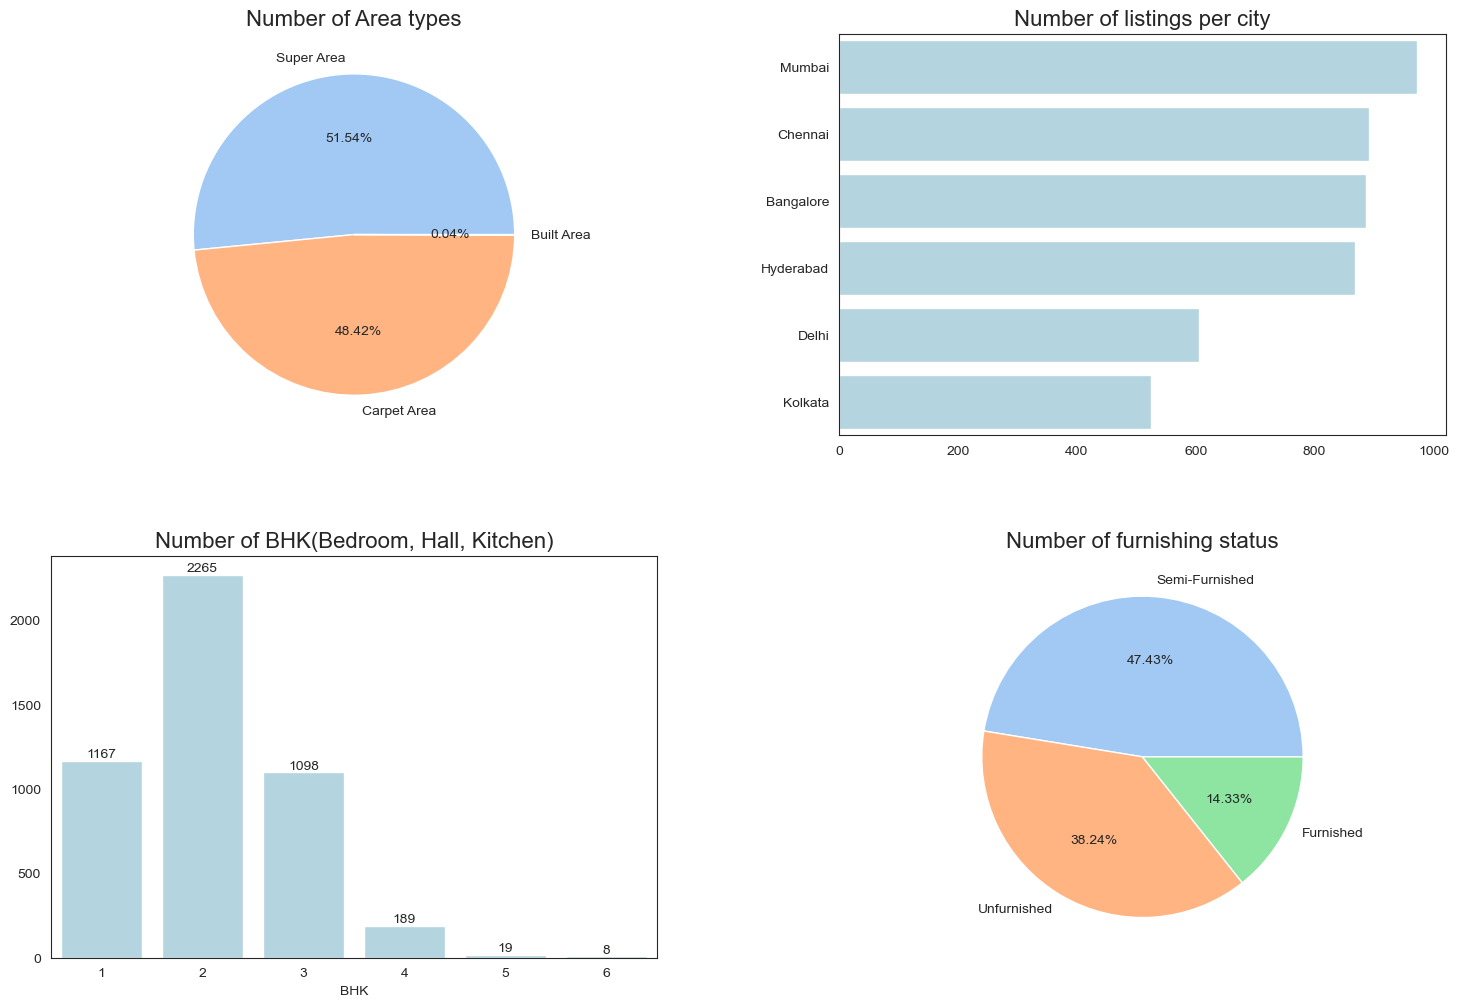

In [16]:
sns.set_style("white")
fig,axes = plt.subplots(figsize=(18,12),nrows=2,ncols=2)

ax1 = axes[0, 0]
area_type_counts = df["Area Type"].value_counts()
ax1.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax1.set_title("Number of Area types", fontsize=16)

# Plot for City
ax2 = axes[0, 1]
sns.barplot(x=df["City"].value_counts().values, y=df["City"].value_counts().index, ax=ax2, color='lightblue')
ax2.set_title("Number of listings per city", fontsize=16)

# Plot for BHK
ax3 = axes[1, 0]
data = df["BHK"].value_counts()
sns.barplot(x=data.index, y=data, ax=ax3, color='lightblue')
ax3.set_title("Number of BHK(Bedroom, Hall, Kitchen)", fontsize=16)
data = data.reset_index()
print(data)
for index,row in data.iterrows():
    # print(index,row)
    ax3.text(row['BHK']-1, row['count'] + 20, str(row['count']), ha='center', fontsize=10)

# Plot for Furnishing Status
ax4 = axes[1, 1]
ax4.pie(df["Furnishing Status"].value_counts().values, labels=df["Furnishing Status"].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax4.set_title("Number of furnishing status", fontsize=16)


for ax_row in axes:
    for ax in ax_row:
        ax.set_ylabel("")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


* As we can see most of the listings are distributed more or less equally throughout the cities with **most** being in **Mumbai** (number) and the **least** in **Kolkata**
* Majority of area types belongs to super area and carpet area with tiny percentage for built area type.
* Majority of rental properties has 2 BHK 
* Also we should know that only a small fraction of them is said to be fully furnished while the other are either unfurnished or semi-furnished

In [17]:
df[df['Rent']>7e5].count()
# For easier visualization I'll skip 4 outliers

Posted On            4
BHK                  4
Rent                 4
Size                 4
Floor                4
Area Type            4
Area Locality        4
City                 4
Furnishing Status    4
Tenant Preferred     4
Bathroom             4
Point of Contact     4
Floor_number         4
Month number         4
Month                4
dtype: int64

                   BHK  Bathroom      Rent  Floor_number      Size
BHK           1.000000  0.794885  0.369718      0.223423  0.716145
Bathroom      0.794885  1.000000  0.441215      0.330185  0.740703
Rent          0.369718  0.441215  1.000000      0.326200  0.413551
Floor_number  0.223423  0.330185  0.326200      1.000000  0.169229
Size          0.716145  0.740703  0.413551      0.169229  1.000000


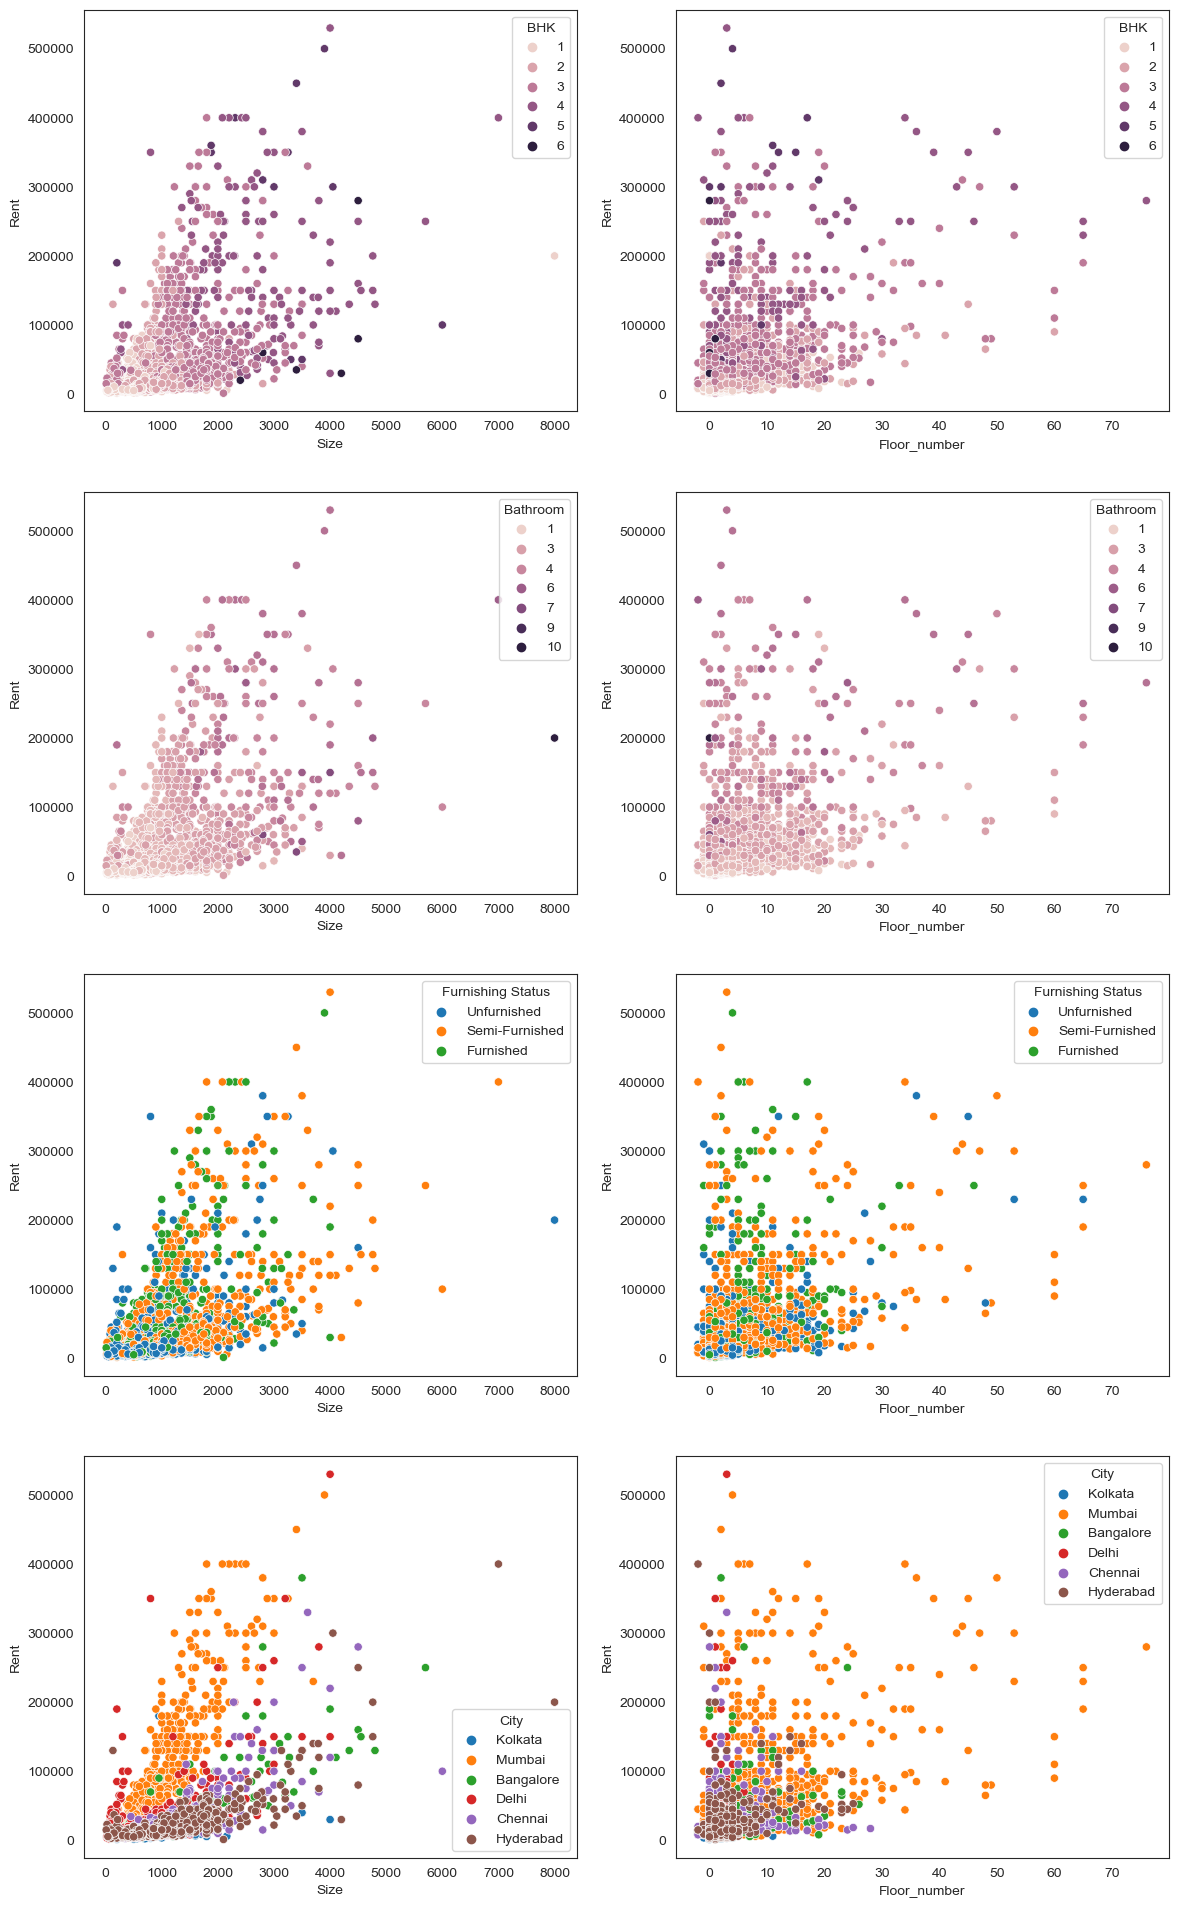

In [18]:
print(df[['BHK','Bathroom','Rent','Floor_number','Size']].corr())
# Chart of rent with hue for bhk, bathroom,rent
# Furnishing status, area type
# Cities
data = df[df['Rent']<6e5]
fig,axes = plt.subplots(figsize=(14,24),nrows=4,ncols=2)
for i,column in enumerate(['BHK','Bathroom','Furnishing Status','City']):
    # axes_num = list(map(int,bin(i*2)[2:].zfill(3)))
    ax1 = axes[i,0]
    sns.scatterplot(y=data['Rent'],x=data['Size'],hue=data[column],ax=ax1)
    ax2 = axes[i,1]
    sns.scatterplot(y=data['Rent'],x=data['Floor_number'],hue=data[column],ax=ax2)


* Brighter colors are common in flats with smaller sizes which means that the bigger the flat, the more BHK and bathrooms are inside which is totally logical\
* 
* Furnishing status appears to be equally distributed among all the sizes
* Among the cities, a clear distinction delineates between more affordable location like Hyderabad and pricier one in Mumbai for instance

#### Now let's dig a little bit deeper to unfold the correlation between size and rent in each city

Text(0, 0.5, 'Rent')

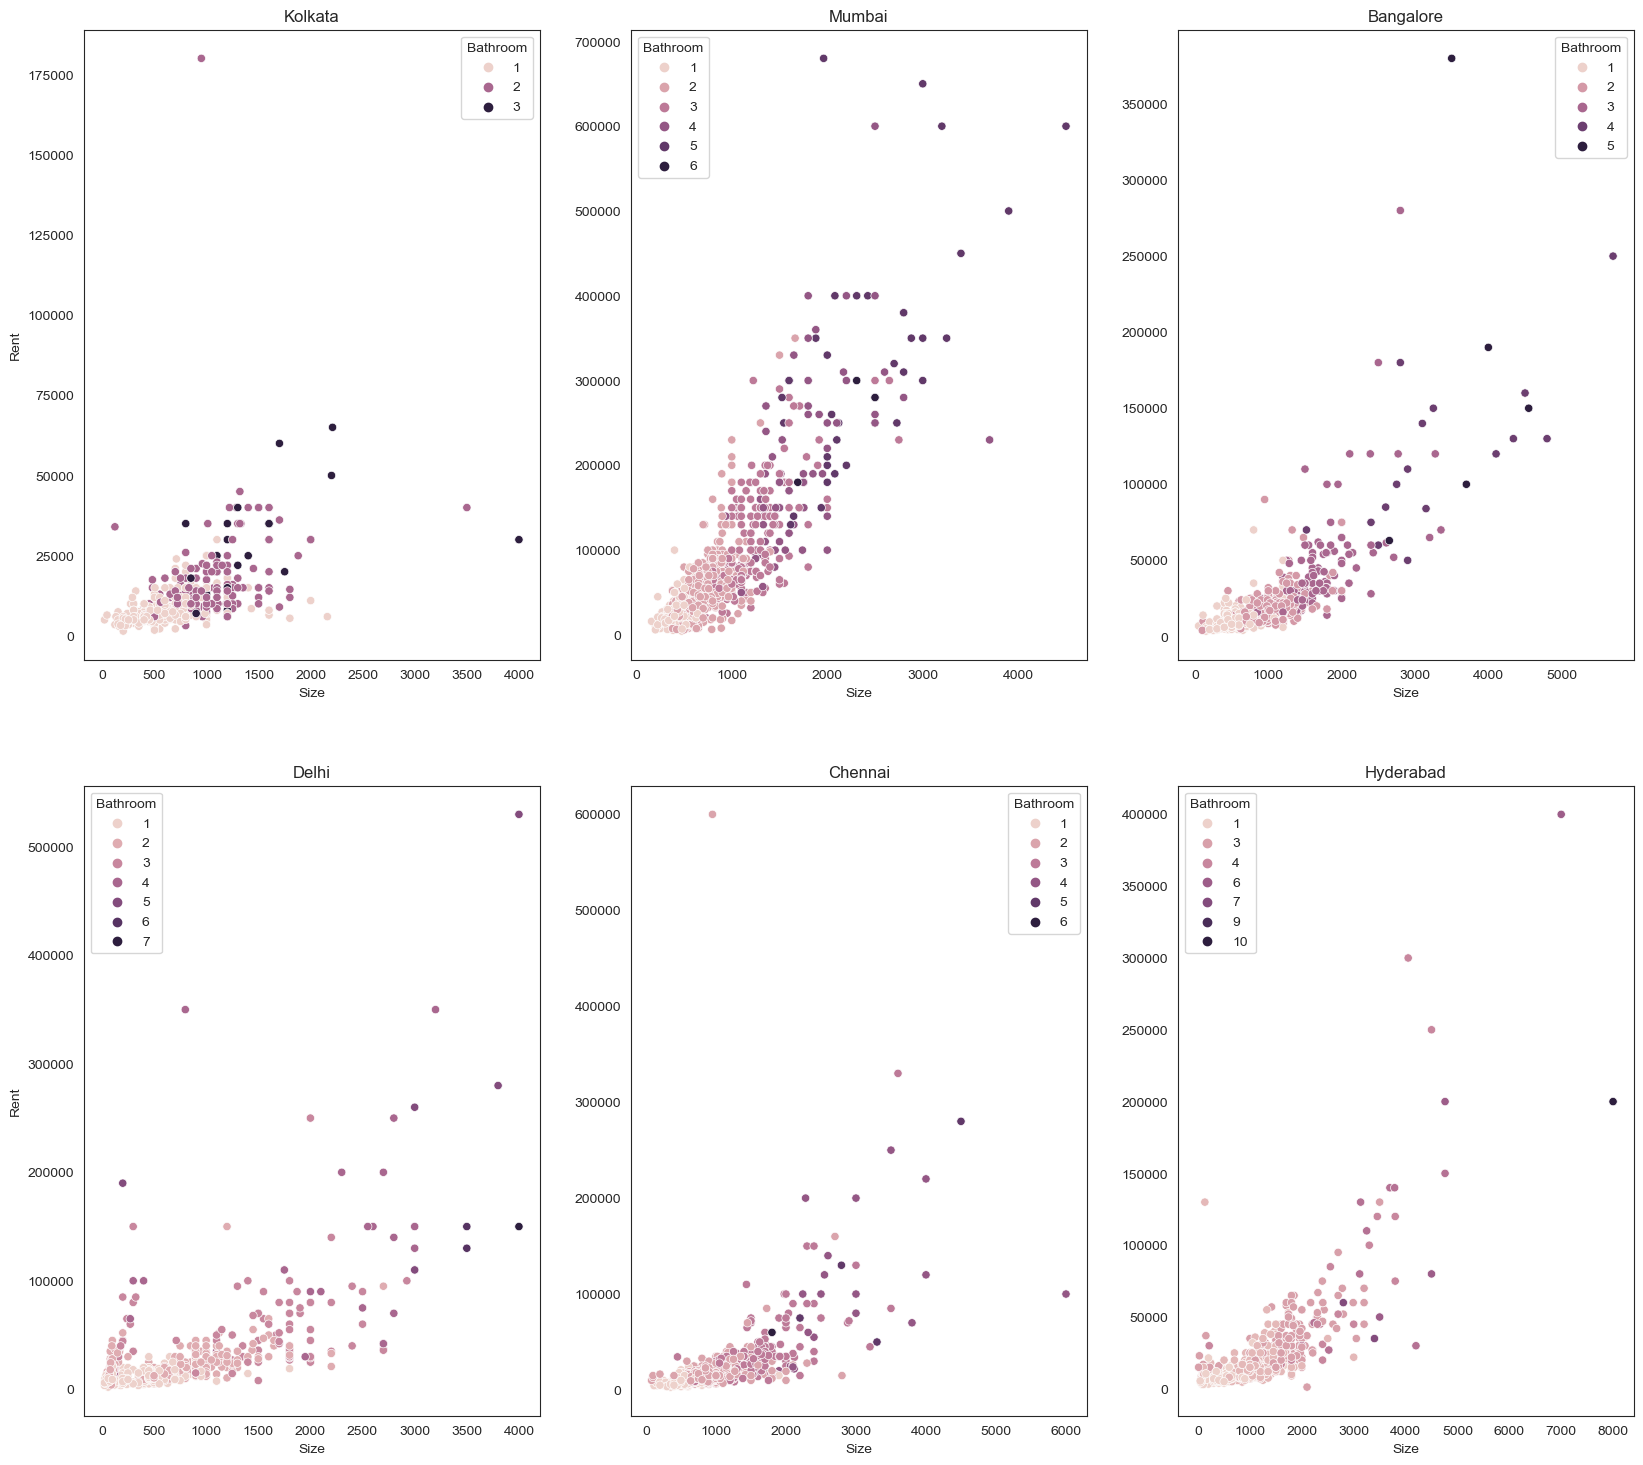

In [21]:
fig,axes = plt.subplots(figsize=(20,18),nrows=2,ncols=3)
data = df[df['Rent']<7e5][['Rent','Size','City','Bathroom']]
for i,city in enumerate(df['City'].unique()):
    
    col = i%3
    row = int(i/3)
    ax=axes[row,col]
    data_plot = data[(data['City']==city)]
    sns.scatterplot(x=data_plot['Size'],y=data_plot['Rent'],ax=ax,hue=data_plot['Bathroom'])
    ax.set_title(city)
    ax.set_ylabel("")
axes[0,0].set_ylabel("Rent")
axes[1,0].set_ylabel("Rent")

* Profound impact of size on the rent price, although not in every city, which may indicate that correlation size-rent differs depending on the city
* Number of bathrooms also tend to rise with size

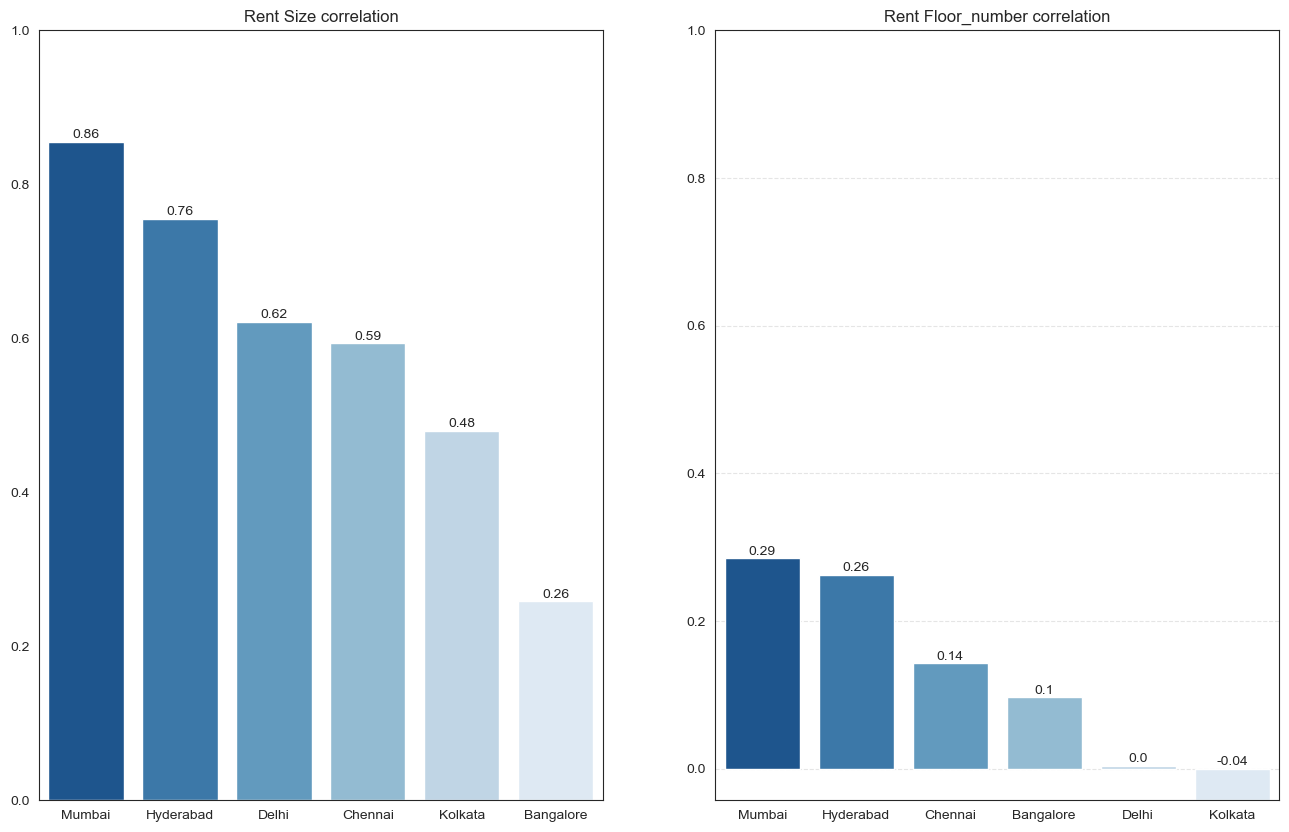

In [ ]:
fig,axes = plt.subplots(figsize=(16,10),ncols=2)
for i,column in enumerate(['Size','Floor_number']):
    ax = axes[i]
    #Correlation for each city and size
    correlation_by_city = df.pivot_table(index='City', values=['Rent', column],aggfunc='corr')
    # correlation_by_city = [(city, correlation_by_city.loc[city].loc['Size']['Rent']) for city in df['City'].unique()]
    correlation_by_city =  correlation_by_city[['Rent']][correlation_by_city['Rent']!=1].sort_values(by="Rent",ascending=False)
    data = correlation_by_city['Rent']
    datax = data.index
    datax = [el[0] for el in datax]
    sns.barplot(y=data.values,x=datax,palette='Blues_r',ax=ax)
    ax.set_title("Rent "+column+" correlation")
    for i,value in enumerate(data.values):
        ax.text(i,max(0.005,value+0.005),s=round(value,2),ha='center')
    ax.set_ylim(min(0,data.values.min()),1)
    
    

plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.gca().set_facecolor('#e5e5e5')


* Mumbai exhibits really high dependency between size of the flat and the Rent price
* In bangalore we have the lowest correlation of 0.26 which significatnly lowers the average correlation
* This insight might be helpful when it comes to running a machine learning model since city plays a vital role in rent prediction